This file is used for fitting the curve of the avaerage value of bottom 5% of CO concentration data for each temperature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Get the raw value of CO concentration and corresponding temperature for each node at each timestamp.
co_temp = pd.read_csv('data/TEMP_CO_raw_hrf.csv',header = 0, index_col=0)

In [5]:
co_temp = co_temp.rename({'value_raw_x':'co_raw', 'value_hrf_x':'co_hrf','value_raw_y':'temp_raw','value_hrf_y':'temp'}, axis =1) 

In [6]:
co_temp.head()

timestamp       node_id  co_raw   co_hrf  temp_raw   temp
4   2018/10/01 00:00:01  001e06114fd4  4009.0 -0.83304     786.0  17.20
8   2018/10/01 00:00:02  001e0610ba46  3548.0 -1.52739     806.0  19.70
13  2018/10/01 00:00:02  001e0610f703  2821.0 -1.30779     786.0  17.20
17  2018/10/01 00:00:02  001e061144c0  3318.0 -3.73174     802.0  19.20
21  2018/10/01 00:00:04  001e0610ee33  4433.0      NaN     787.0  17.35

In [8]:
co_temp.timestamp = pd.to_datetime(co_temp.timestamp)

In [9]:
# The time span is from 2018-10-01 to 2019-07-31.
co_temp.timestamp.describe()

count                28507504
unique               12973891
top       2019-01-11 11:30:57
freq                      634
first     2018-10-01 00:00:01
last      2019-07-31 23:59:58
Name: timestamp, dtype: object

In [10]:
# We have 65 nodes that contain information of NO2 concentration from 2018-10-01 to 2019-07-31.
co_temp['node_id'].nunique()

65

In [11]:
co_temp.groupby('node_id').describe()

co_raw                                                   \
                  count          mean           std        min       25%   
node_id                                                                    
001e06109401    34750.0  11047.225324  23320.056192     -673.0   3981.00   
001e06109416   192248.0   3127.588079   1836.331871     -813.0   1966.00   
001e0610b9e9    58966.0   2260.685039  12901.172443    -2644.0   1524.00   
001e0610ba13   975426.0   3120.766697   3650.154724    -5987.0   1547.00   
001e0610ba15  1393369.0   2319.184718   4595.699659   -59309.0   1508.00   
001e0610ba16   215713.0   4362.361100   2173.106821     1388.0   2918.00   
001e0610ba46  1229548.0   2803.676510   2393.552243    -1112.0   1846.00   
001e0610bbf9    25651.0   8465.390589  22762.535422 -1471265.0   5283.00   
001e0610bc10   891514.0   2321.647707  13740.888704 -1161979.0    516.00   
001e0610bc12   104408.0   3205.554268  19711.721627     -376.0   1884.00   
001e0610e532    26268.0   1613.205840  44703.663920   -60881.0   -629.25   
001e0610e537  1727600.0   2271.919360   2387.425969  -396675.0   1516.00   
001e0610e539   166522.0   3746.778798  14098.727279 -1414557.0   2384.00   
001e0610e835   699311.0   3916.427507   9139.377254 -1409127.0   1922.00   
001e0610e8cb    54841.0   7678.301107  91819.916931  -254305.0   1286.00   
001e0610ee33  1564242.0   2440.675268   1406.014683    -3324.0   1686.00   
001e0610ee43  1726472.0   2388.327854   1844.931817     -819.0   1350.00   
001e0610ee5d    48543.0   7274.787982   2720.121714     -864.0   5131.00   
001e0610ee82   237573.0   2853.513042   1509.222582     -936.0   1867.00   
001e0610eef2   915543.0   3089.619251  21836.574526  -120641.0   1541.00   
001e0610ef27  1005570.0   3819.107838   6468.700771   -11724.0   2103.00   
001e0610f02f    63662.0 -22340.545930  76575.162287 -1134874.0 -29183.50   
001e0610f05c  1392899.0   1913.652415   4351.315660   -53197.0   1740.00   
001e0610f6db  1276460.0   1697.186472    927.667072    -6922.0   1136.00   
001e0610f703   432067.0   4959.044944  59788.847614 -1471265.0   1602.00   
001e0610f732    89852.0   3110.043349   2745.086502   -11988.0   2009.75   
001e06112e77   295076.0   2805.682089   1739.159252    -7849.0   1647.00   
001e061130f4  1472364.0   2204.888255   3537.344203    -1297.0   1385.00   
001e06113107  1213716.0   2551.713090   2645.306136    -4387.0   1388.00   
001e061135cb   201510.0   4221.453283  38497.867177  -132699.0   2007.00   
...                 ...           ...           ...        ...       ...   
001e06113d78    30459.0   2430.095735   2471.464242    -8868.0   1729.50   
001e06113dbc   526973.0   3379.263029  13378.992037   -95583.0   1617.00   
001e06113f54    28682.0   5995.655463   2016.319791     1142.0   4470.00   
001e0611441e     1028.0  16268.127432  76715.200726    -1942.0   8133.25   
001e061144be    34852.0   5138.958195  11178.820028      158.0   2835.00   
001e061144c0  1036833.0   2649.720041   6040.400535  -639350.0   1368.00   
001e061144d6    52017.0   3434.287502   1759.353292    -1571.0   2164.00   
001e06114500  1007135.0   2176.968896   5937.407678 -1379700.0   1438.00   
001e06114503   435446.0   2865.651332   4357.368659    -6871.0   1541.00   
001e0611462f   132441.0   3826.424589   5147.596770   -40477.0   2452.00   
001e061146bc   456145.0   4171.258823   6323.342152  -746084.0   1853.00   
001e061146cb   232145.0   3618.891176   1614.298707    -1186.0   2359.00   
001e06114fcf   215228.0   3167.856413  10652.471168     -628.0   1882.00   
001e06114fd4   813257.0   2427.078814   5332.536710  -134350.0   1549.00   
001e06115365   164613.0   7026.406390   2735.344095      467.0   5081.00   
001e06115369    31010.0   3666.908030   7166.496856    -2375.0   2550.00   
001e0611537d   124548.0   5413.198879   2256.249312      226.0   3723.00   
001e06117b41   120853.0   8393.708100  12328.391268    -1458.0   5301.00   
001e06117b44    44887.0   9597.289260   3647.690276     2955.0   

In [9]:
#Get dataframes for each node and save it into a dictionary.
# nodes={}
# for node_id in no2_temp['node_id'].unique():
#     nodes[node_id] = no2_temp[no2_temp['node_id'] == node_id]
#     no2_temp[no2_temp['node_id'] == node_id].to_csv('nodedata/'+str(node_id)+'.csv')

In [13]:
nodes = list(co_temp['node_id'].unique())

In [14]:
def func(x, a, b, c):
    return a*np.exp(b*x)+c

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


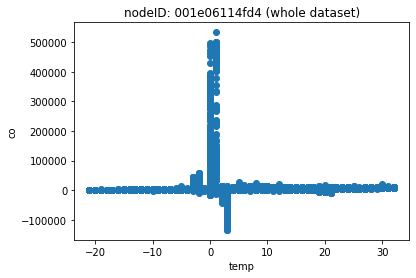

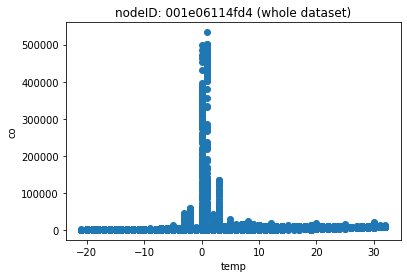

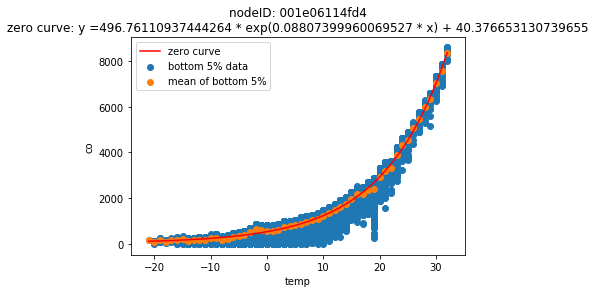

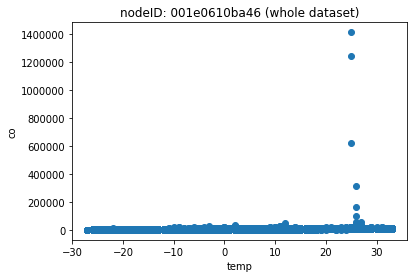

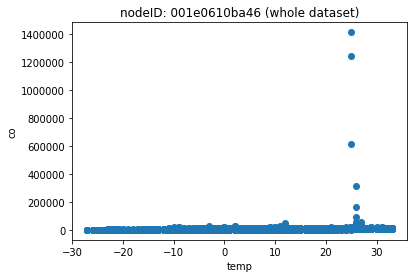

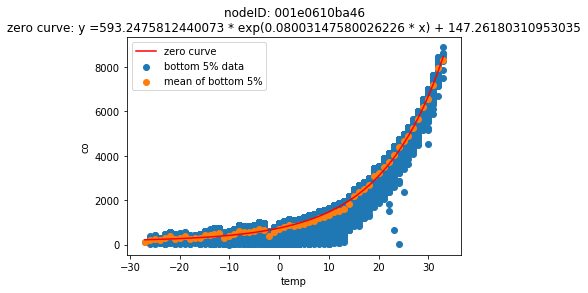

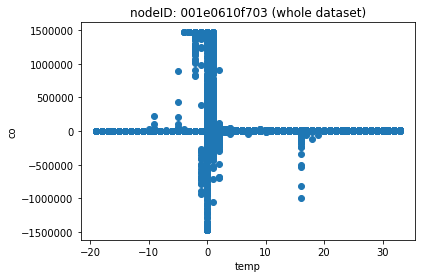

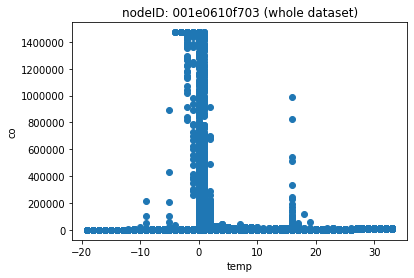

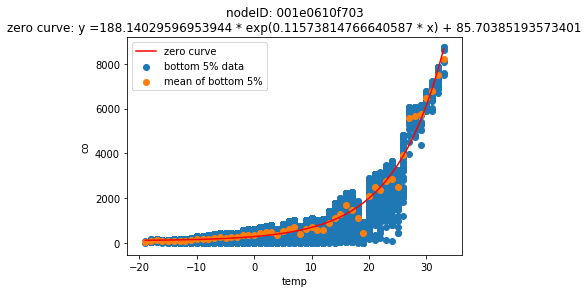

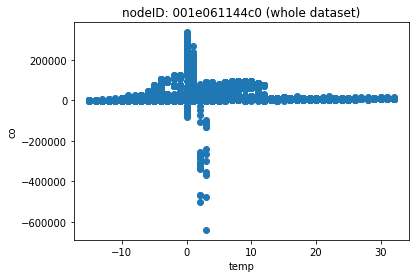

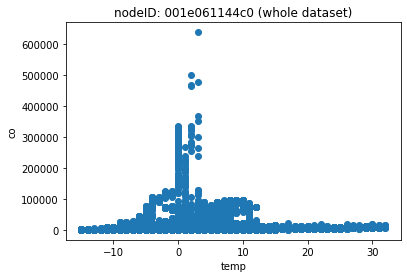

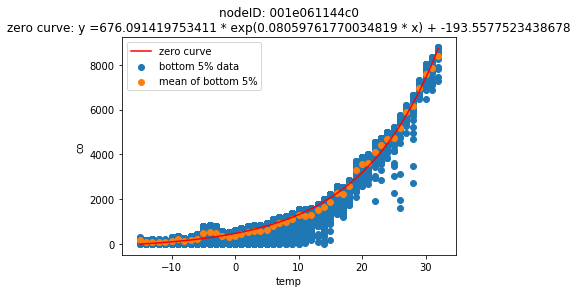

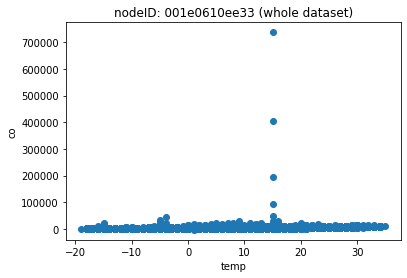

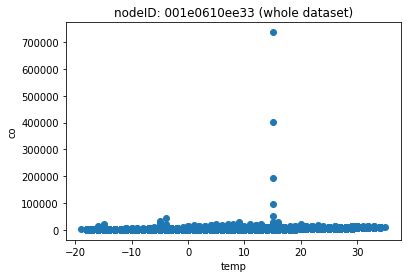

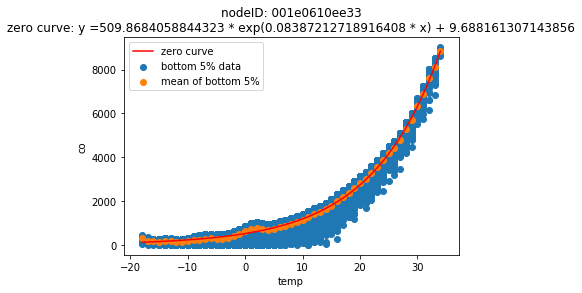

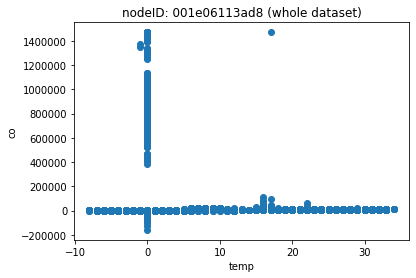

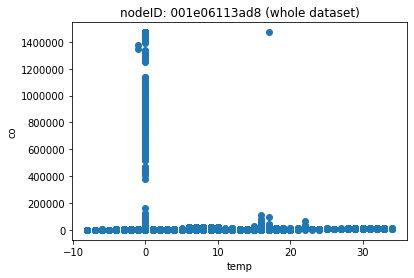

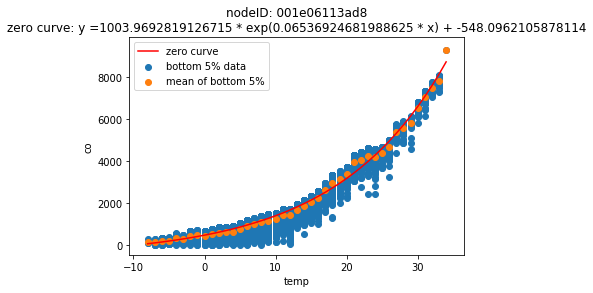

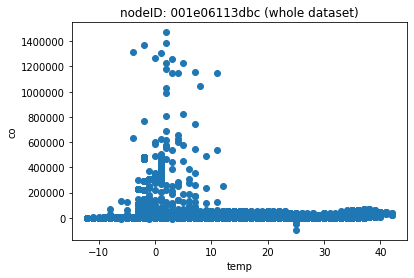

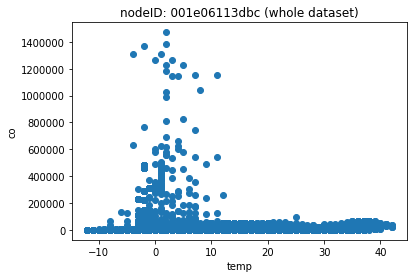

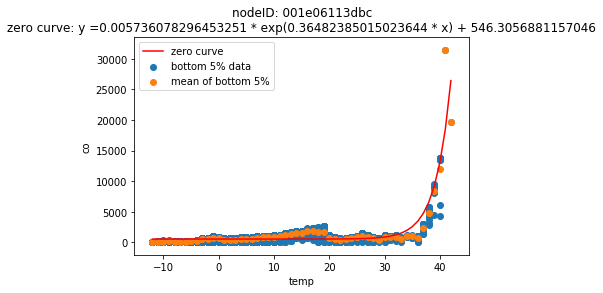

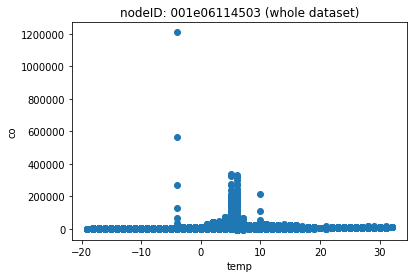

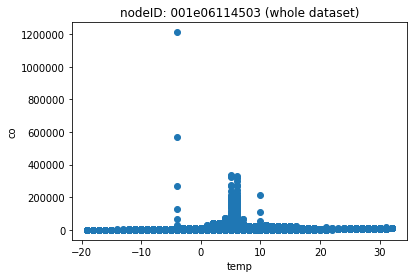

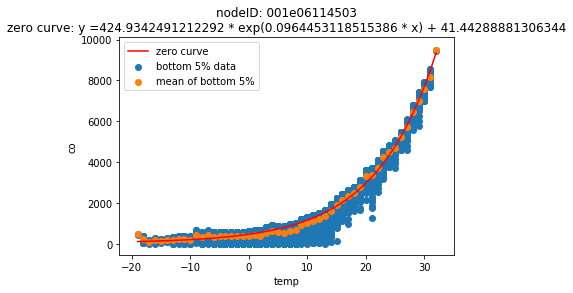

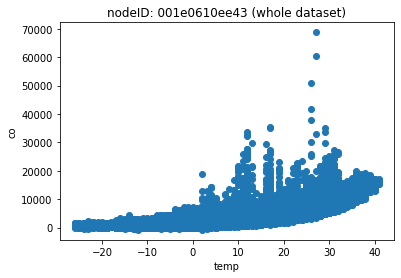

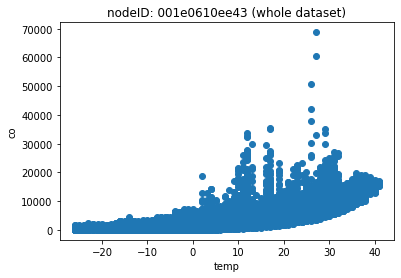

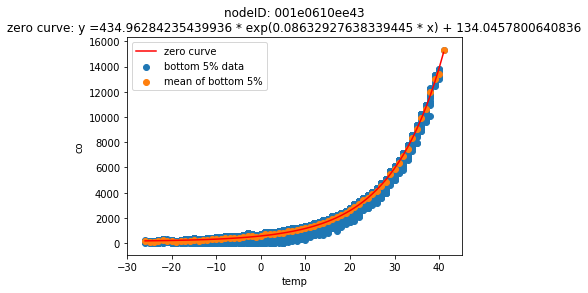

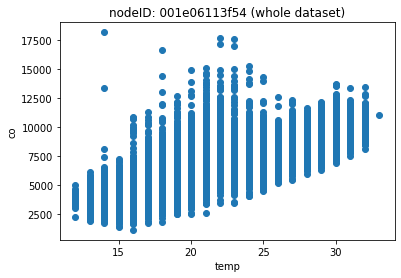

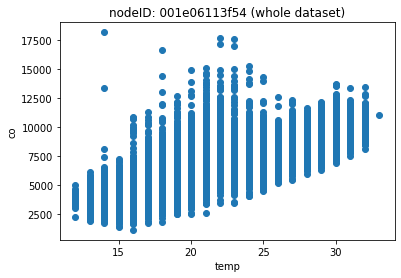

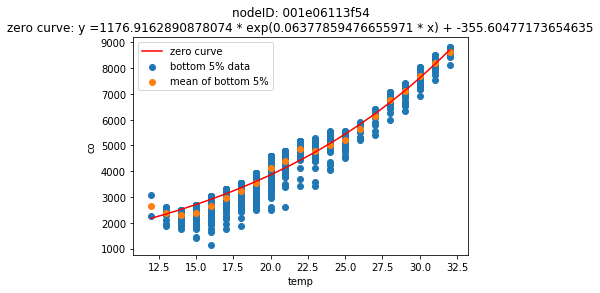

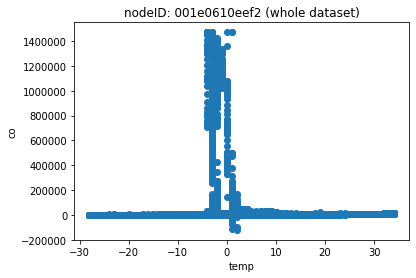

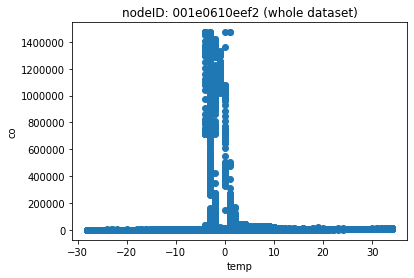

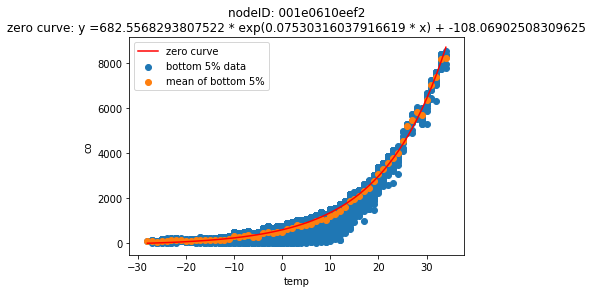

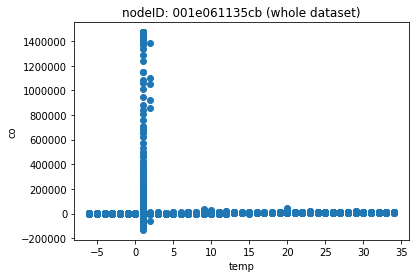

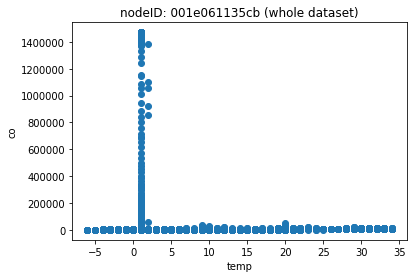

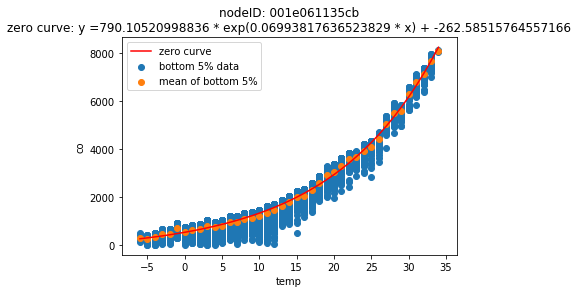

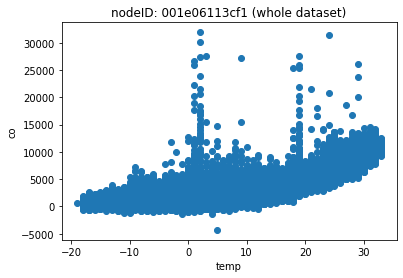

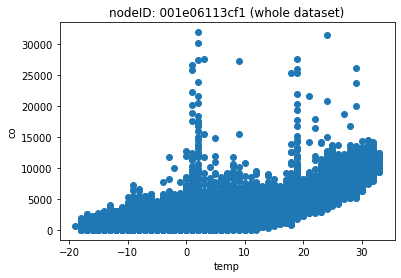

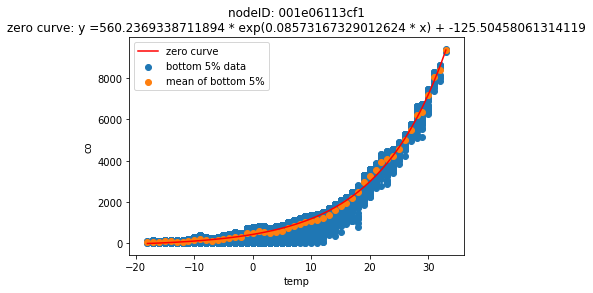

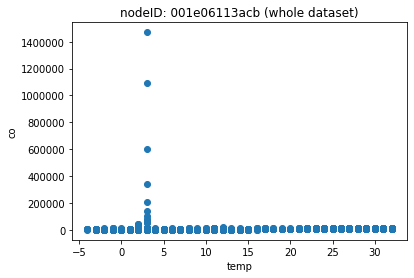

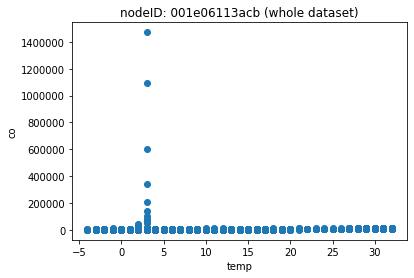

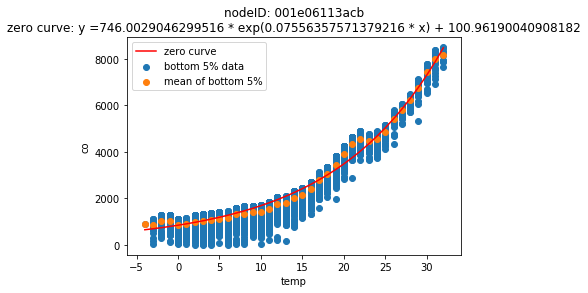

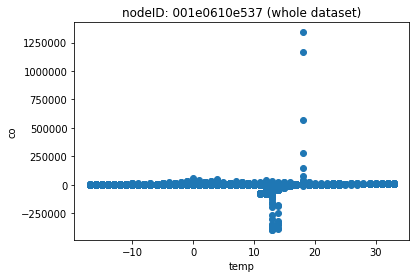

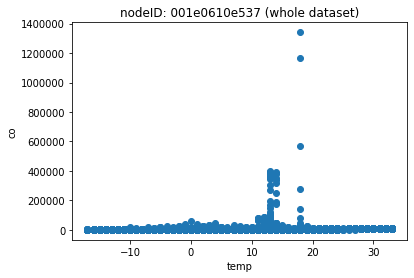

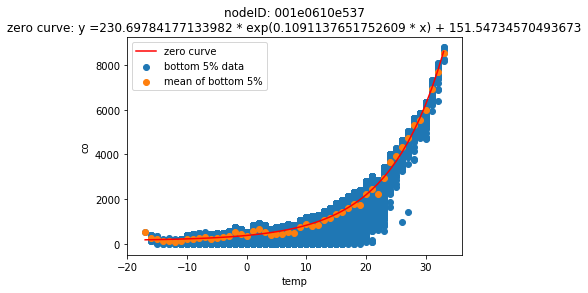

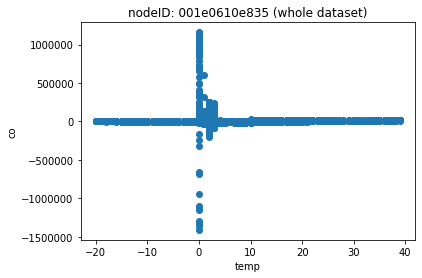

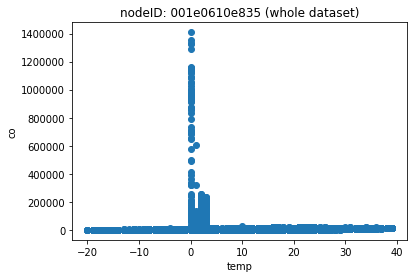

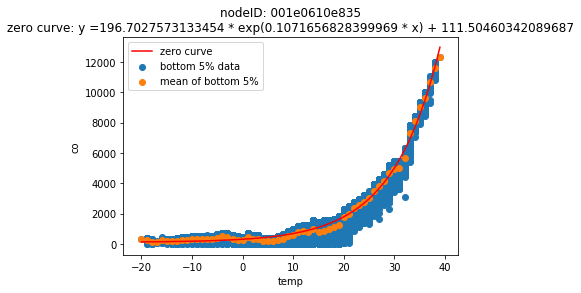

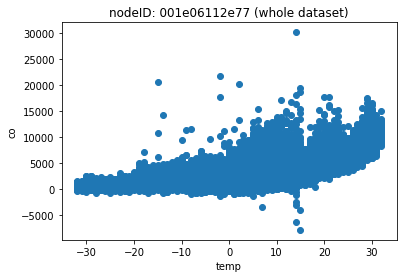

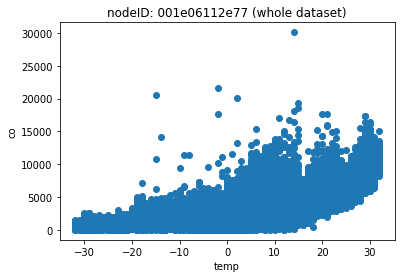

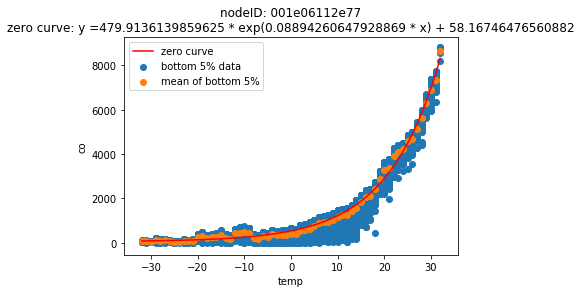

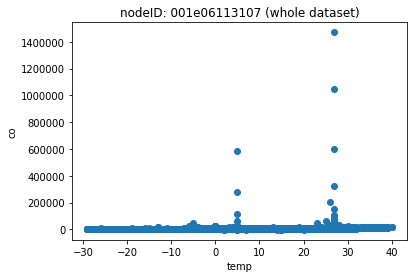

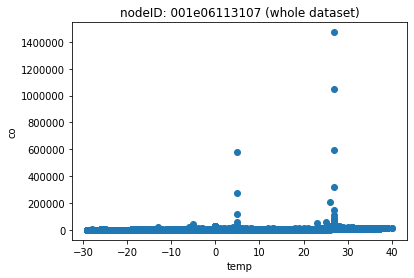

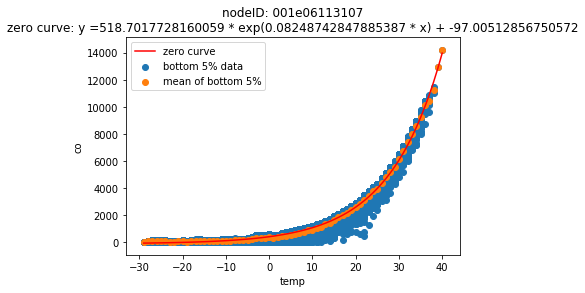

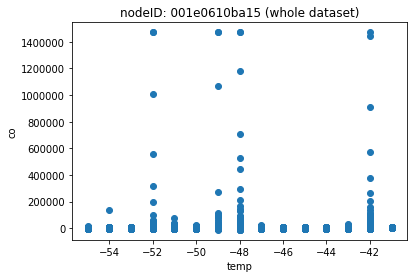

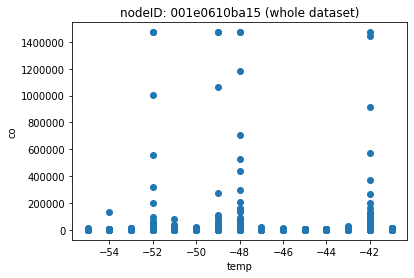

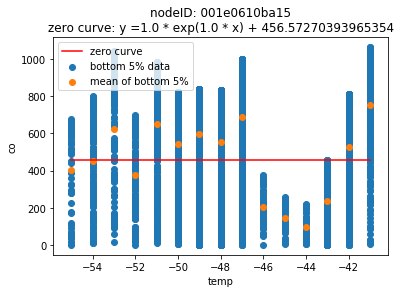

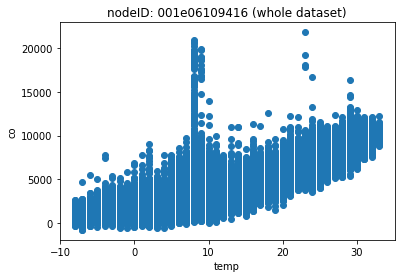

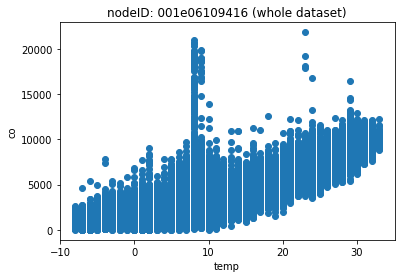

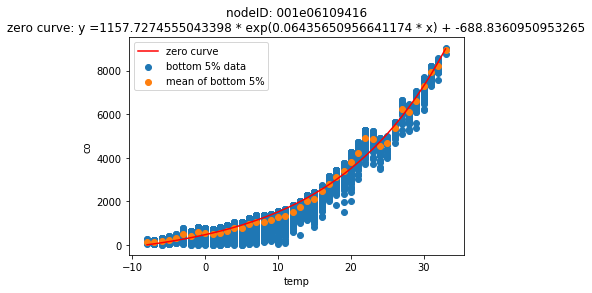

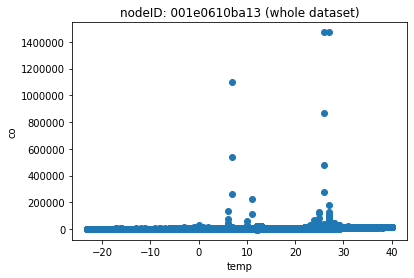

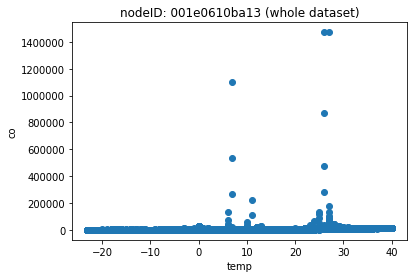

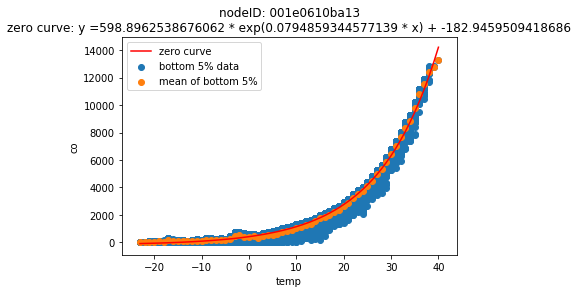

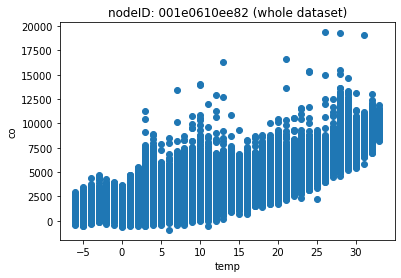

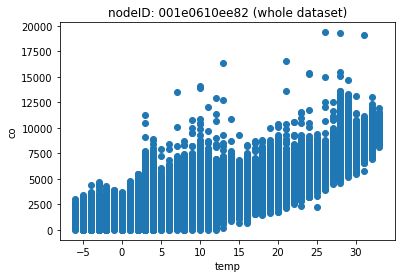

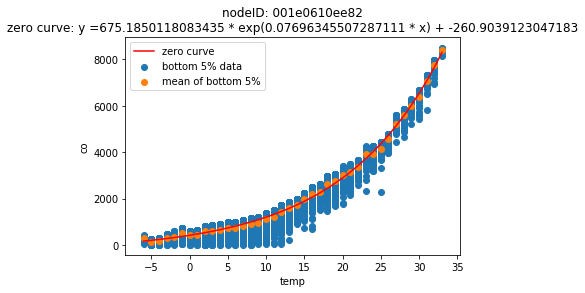

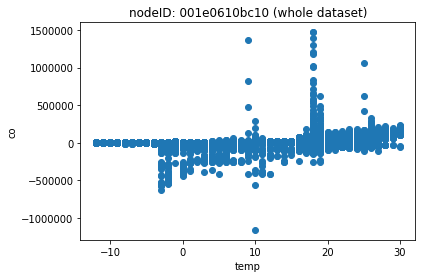

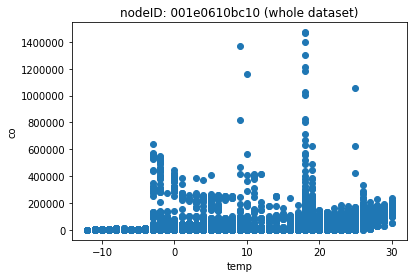

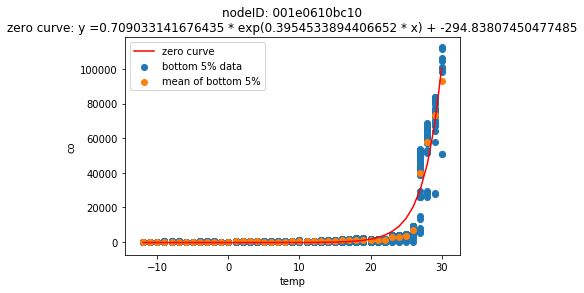

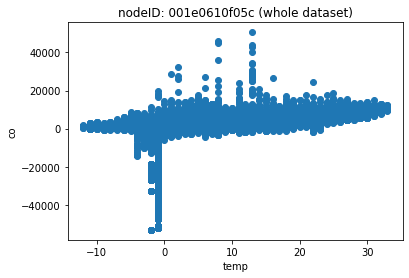

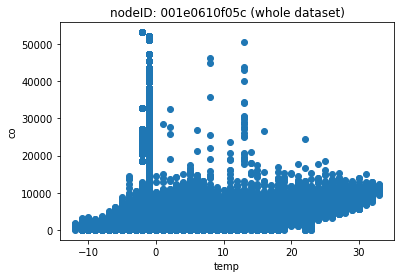

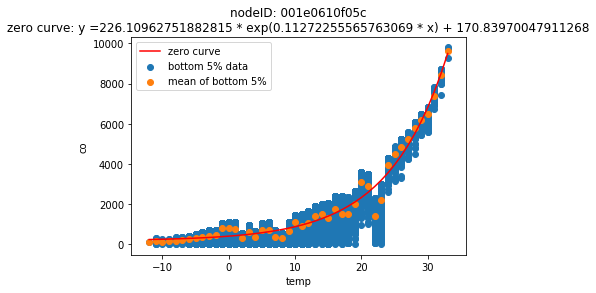

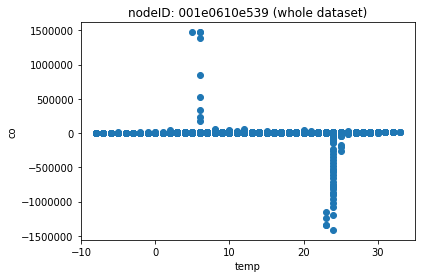

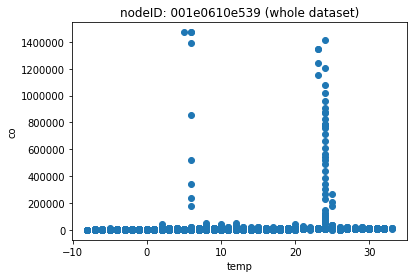

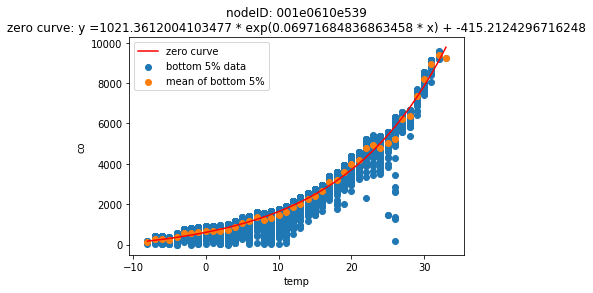

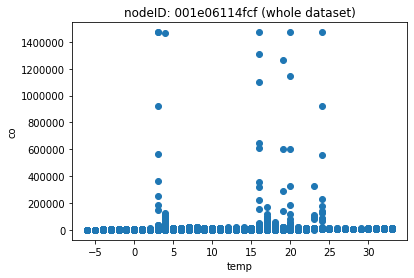

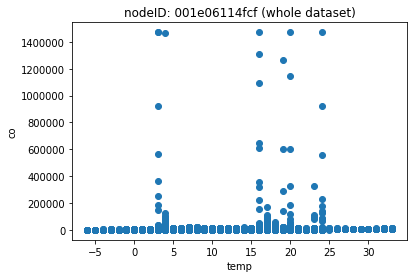

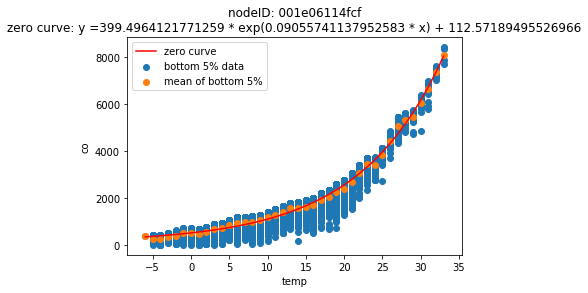

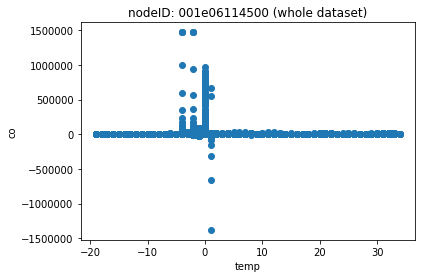

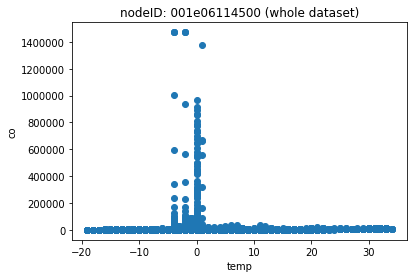

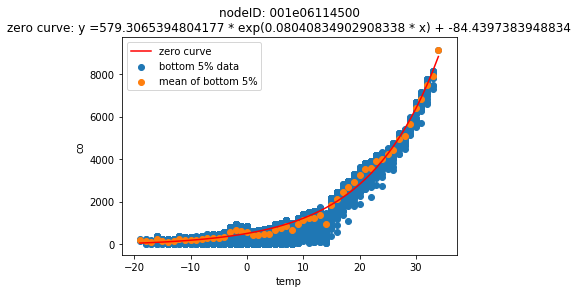

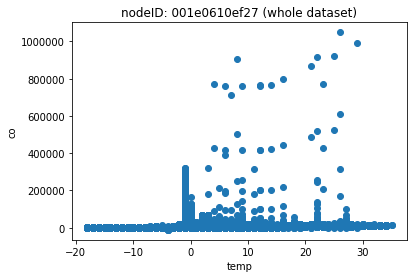

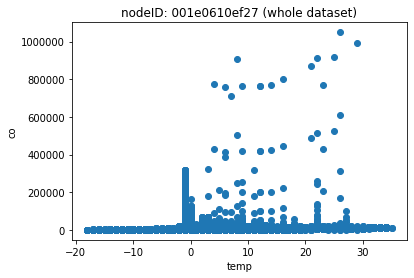

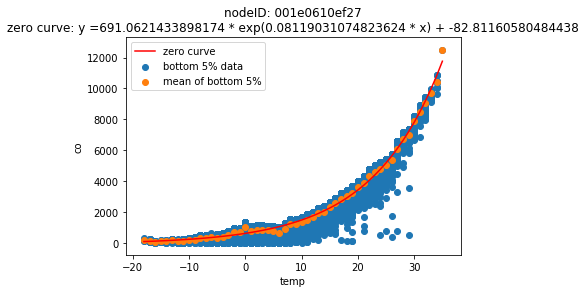

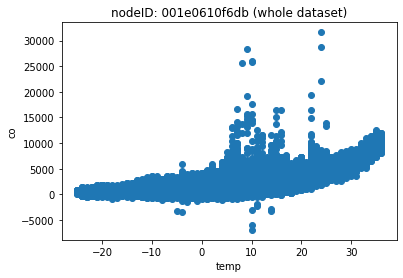

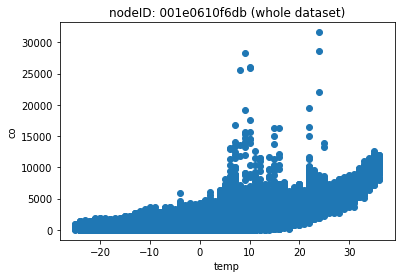

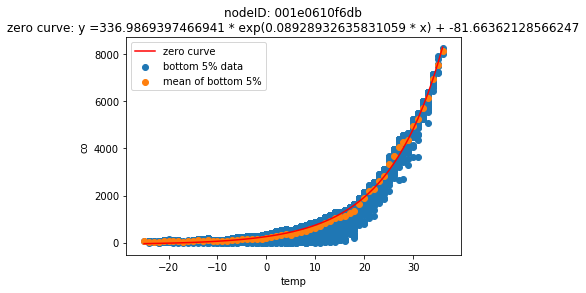

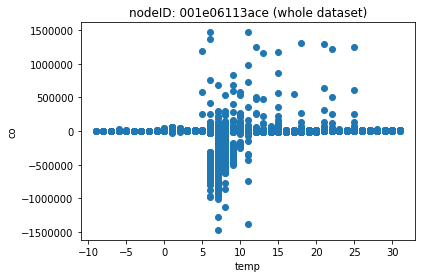

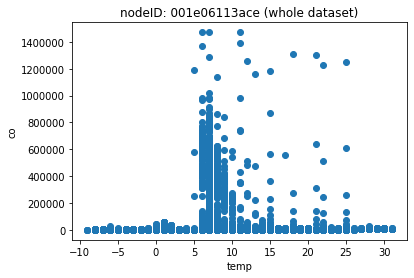

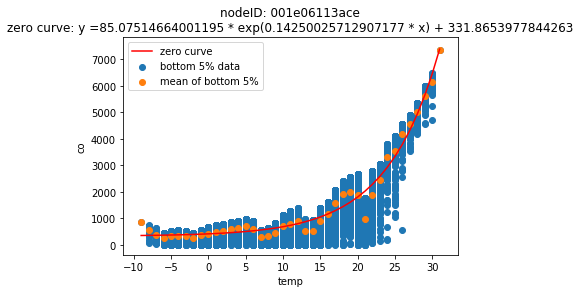

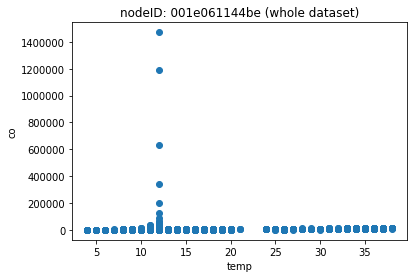

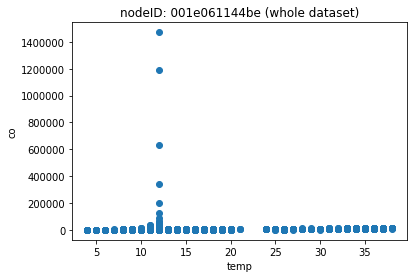

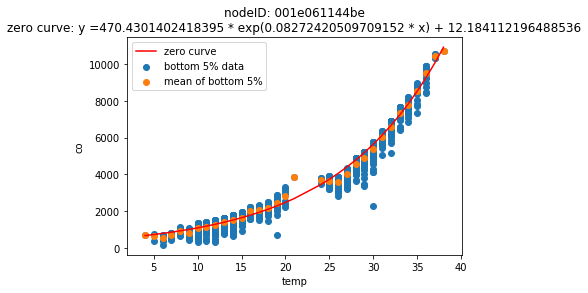

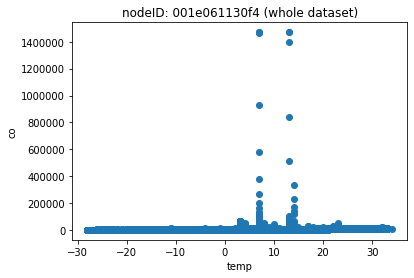

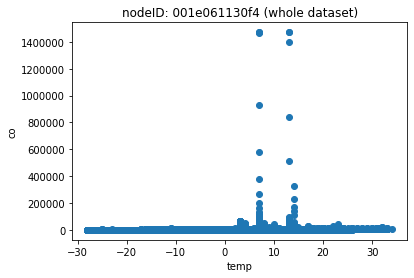

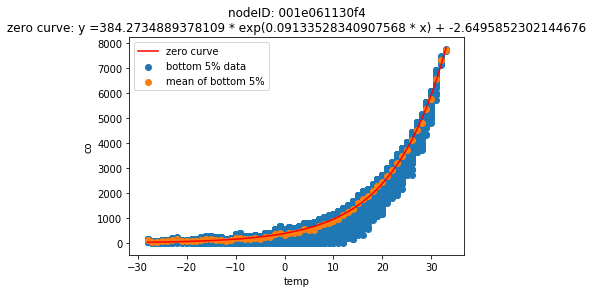

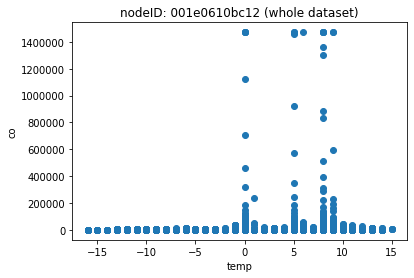

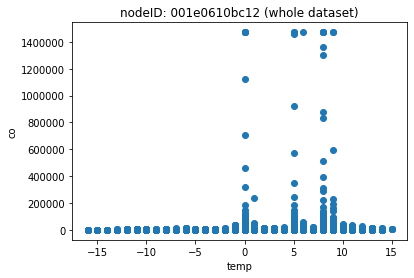

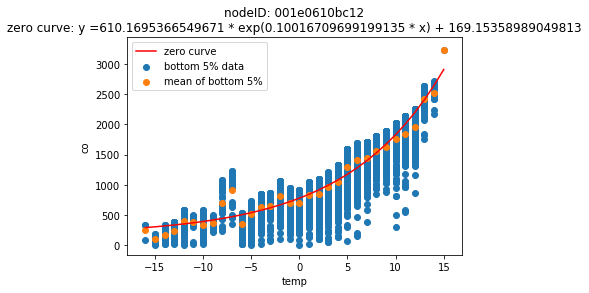

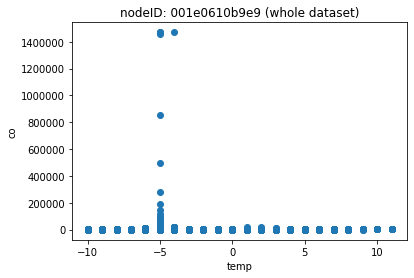

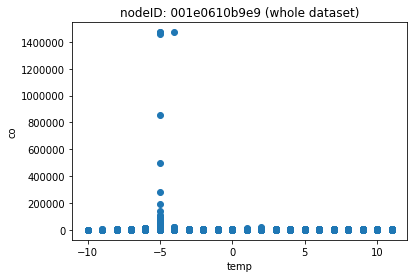

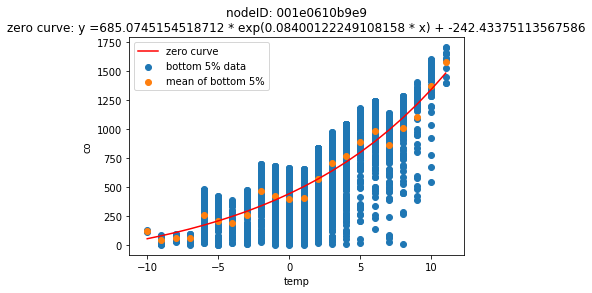

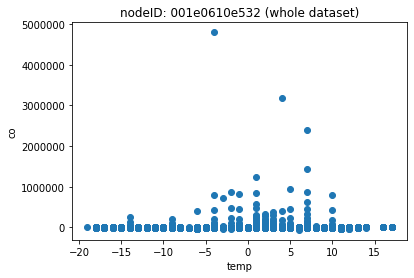

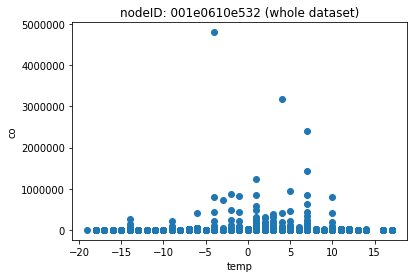

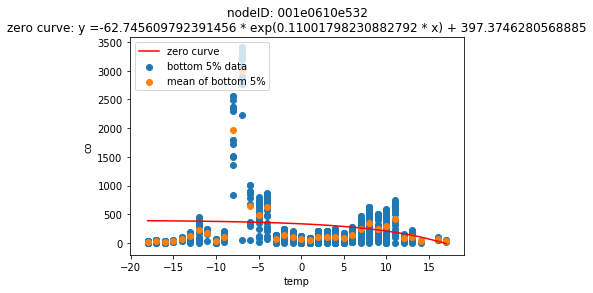

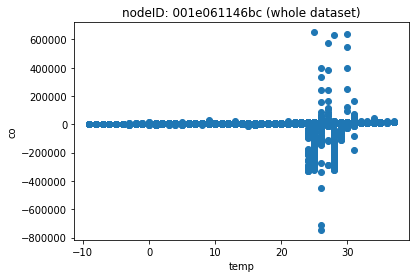

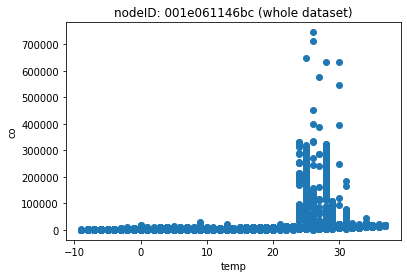

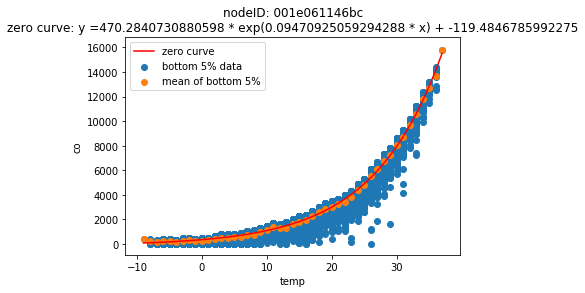

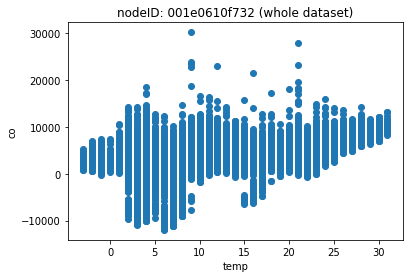

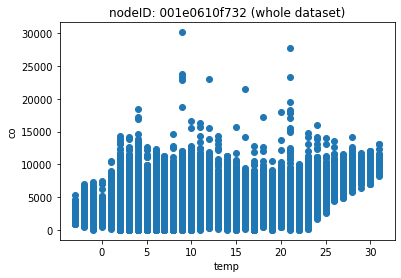

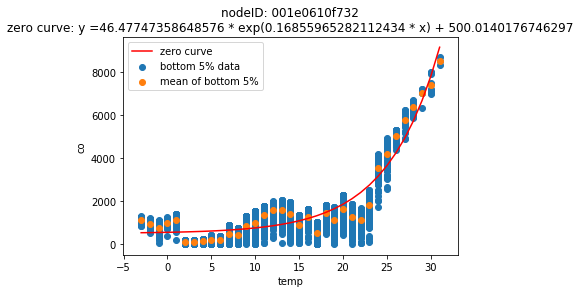

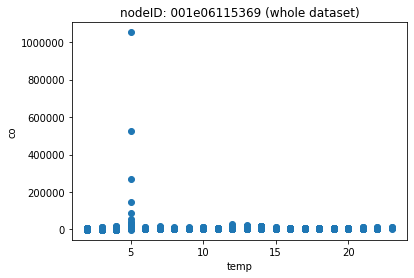

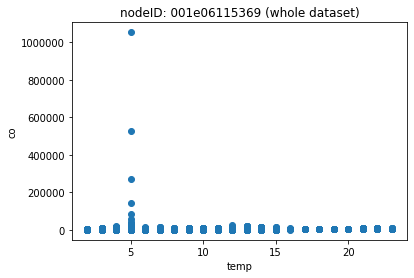

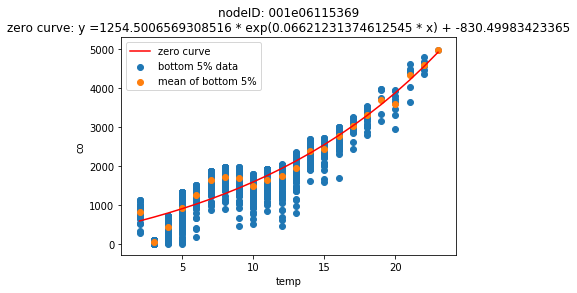

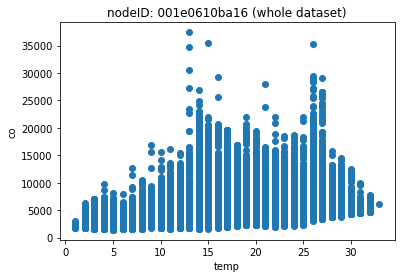

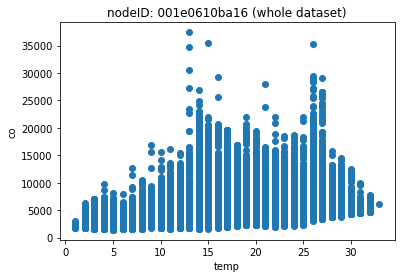

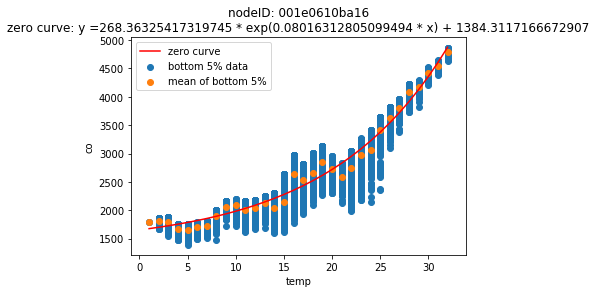

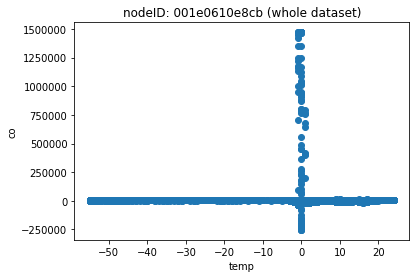

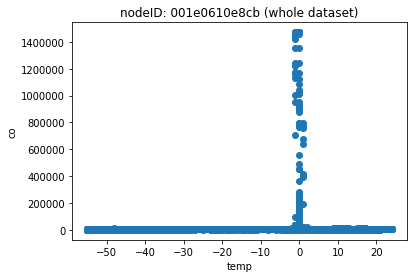

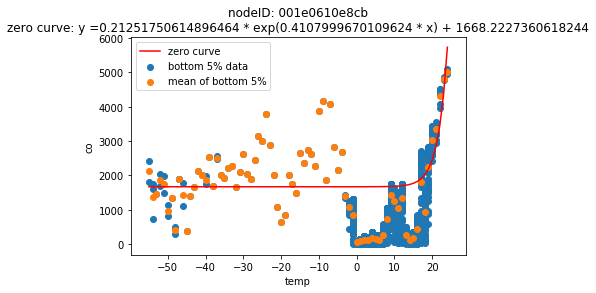

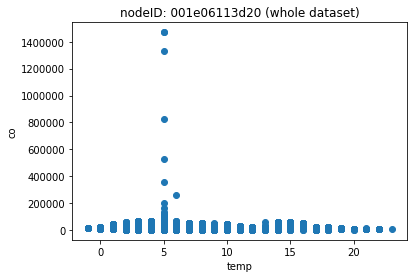

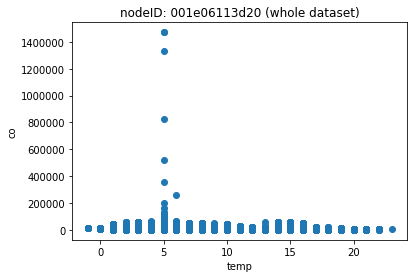

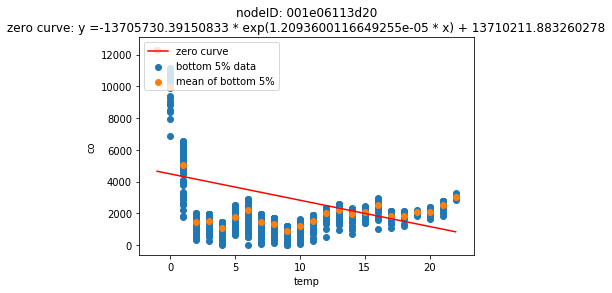

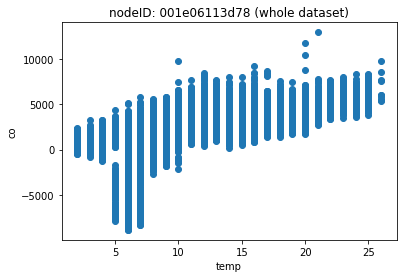

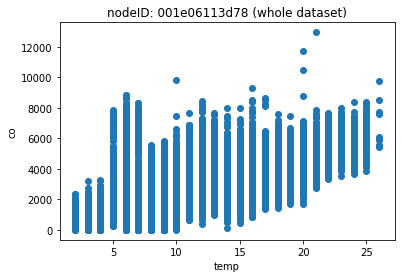

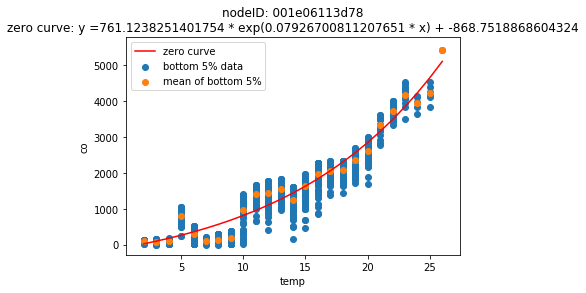

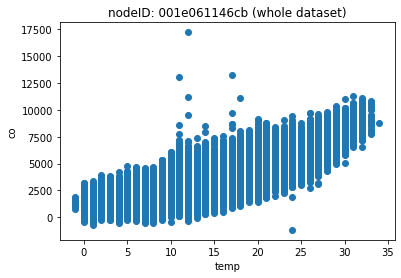

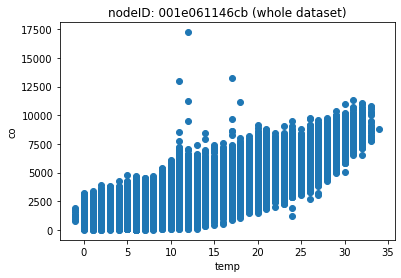

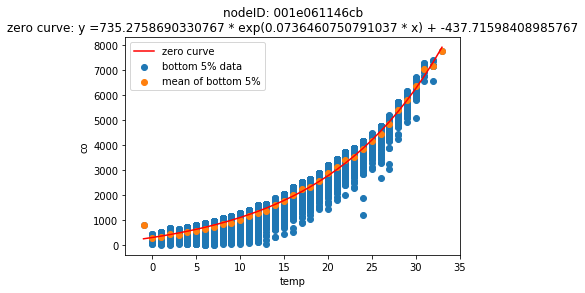

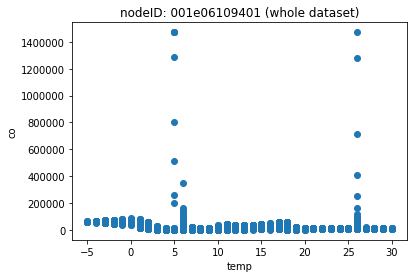

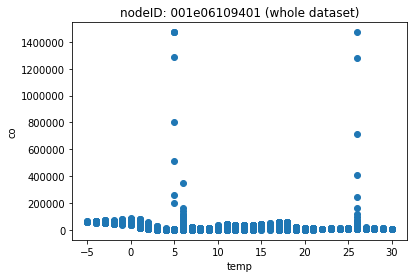

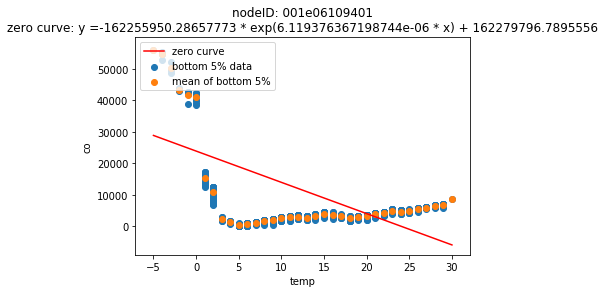

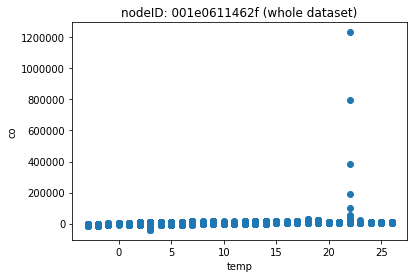

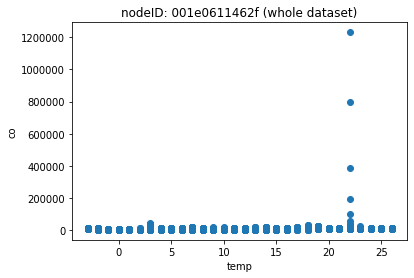

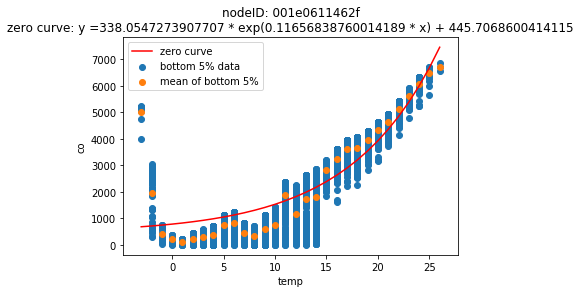

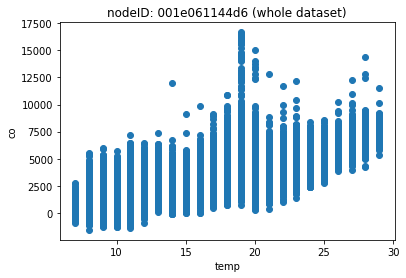

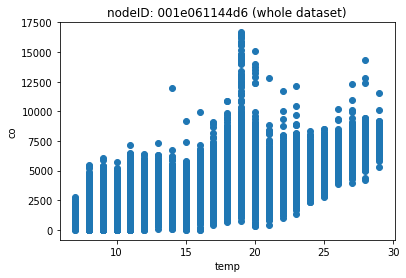

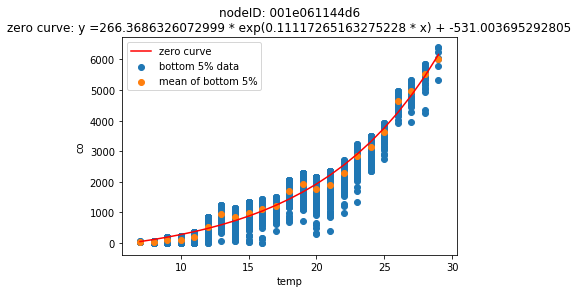

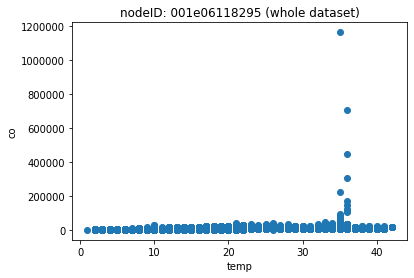

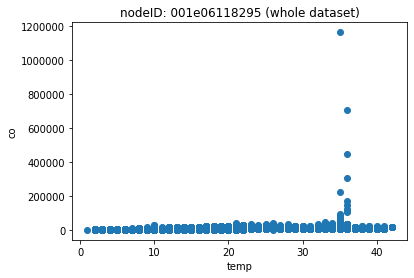

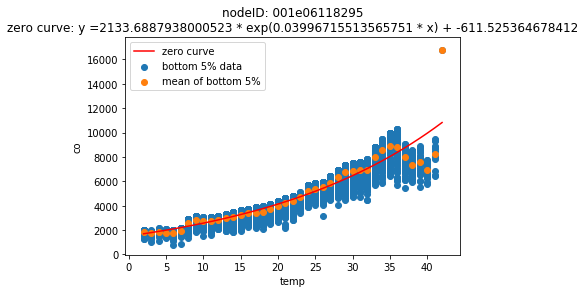

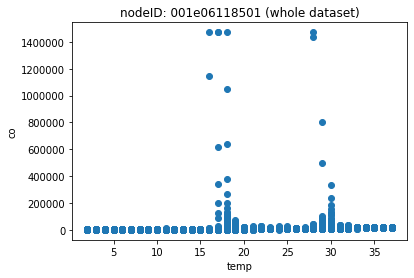

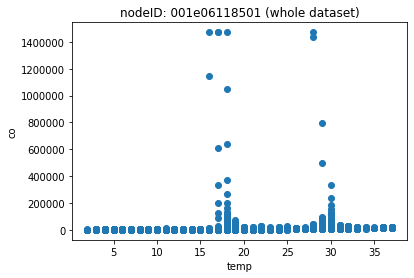

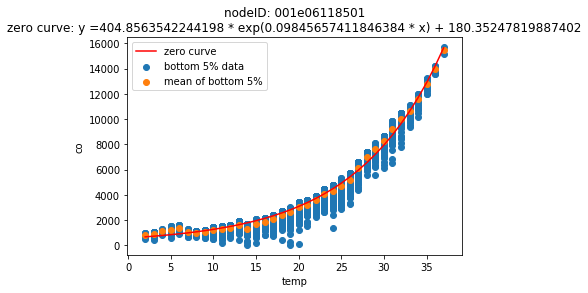

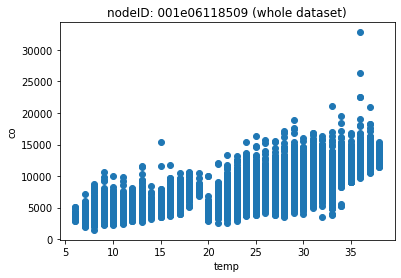

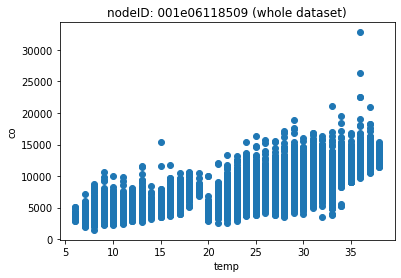

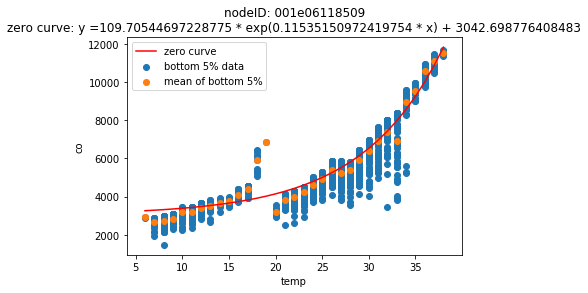

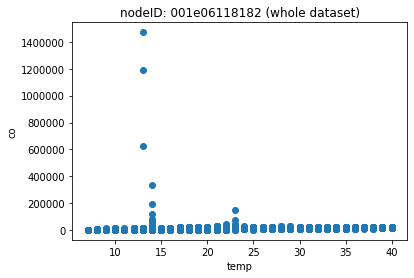

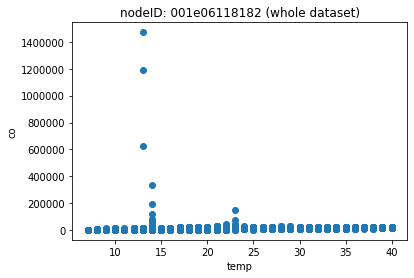

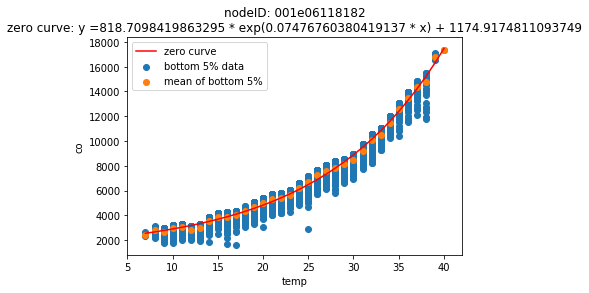

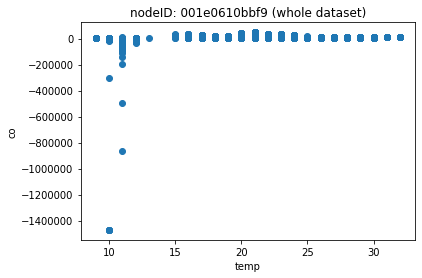

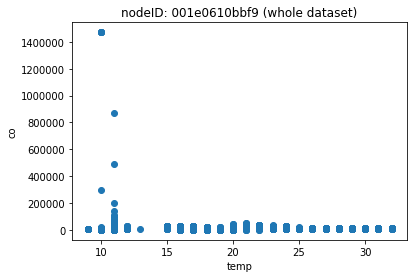

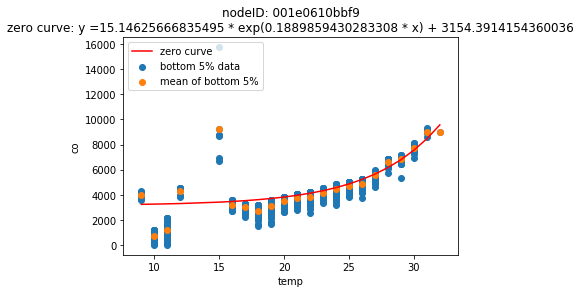

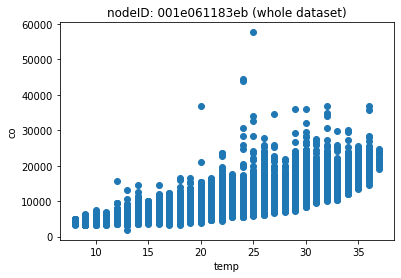

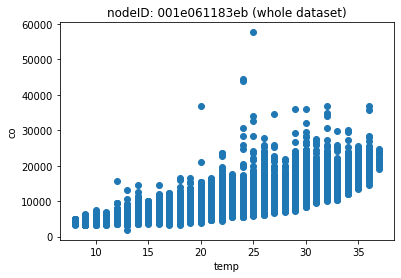

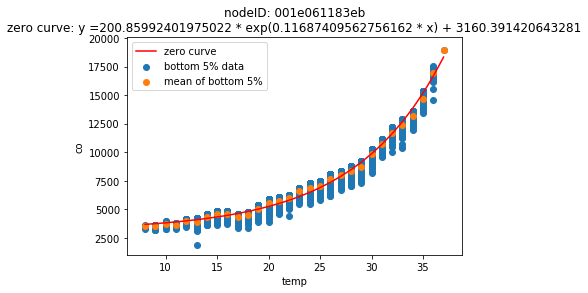

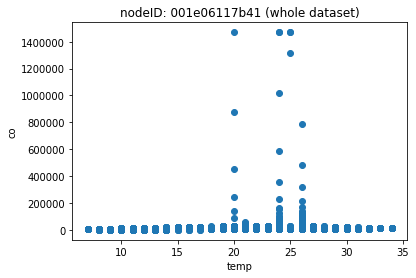

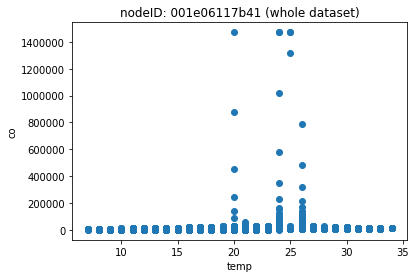

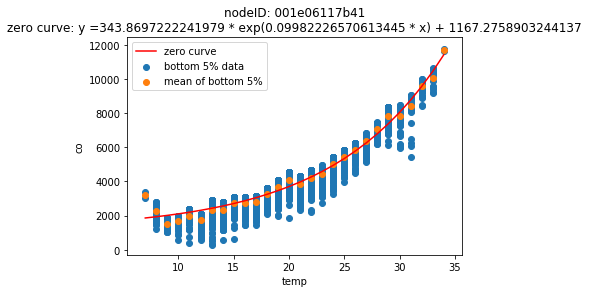

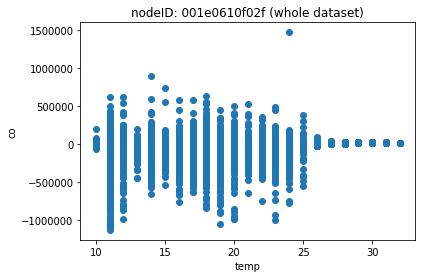

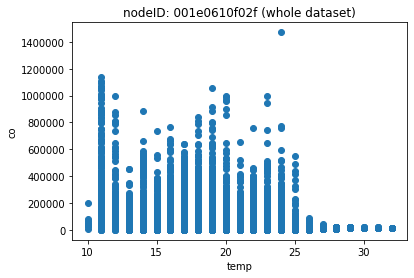

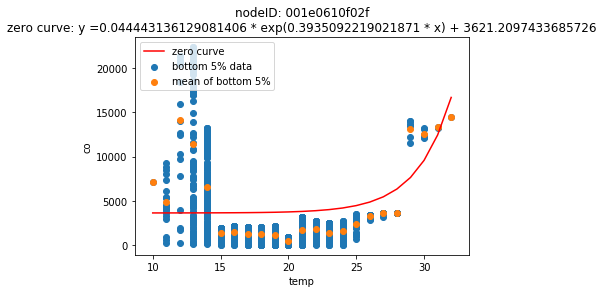

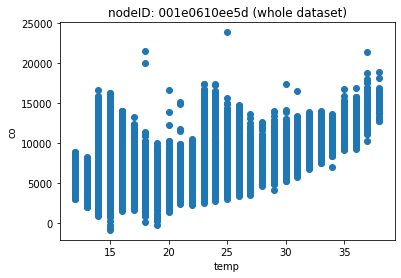

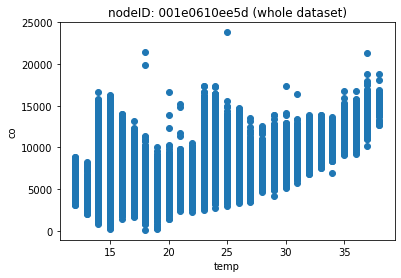

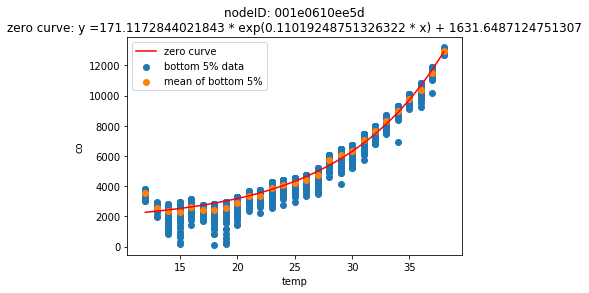

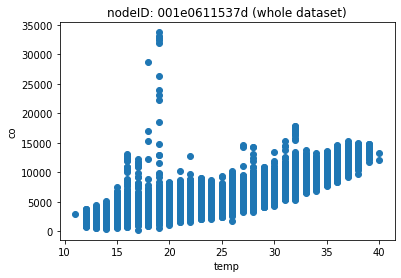

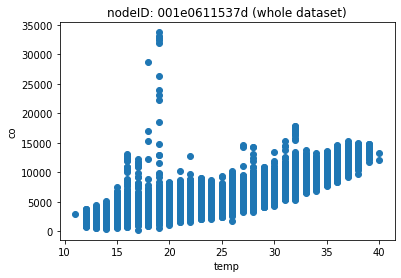

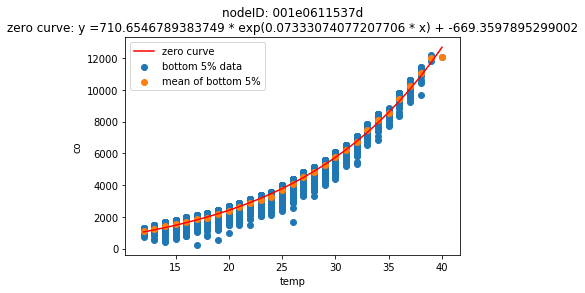

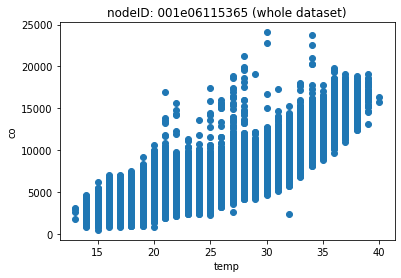

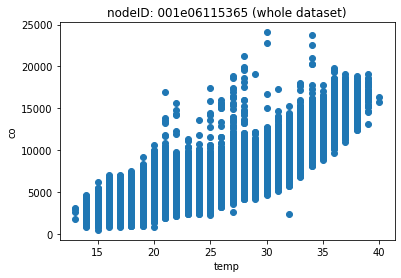

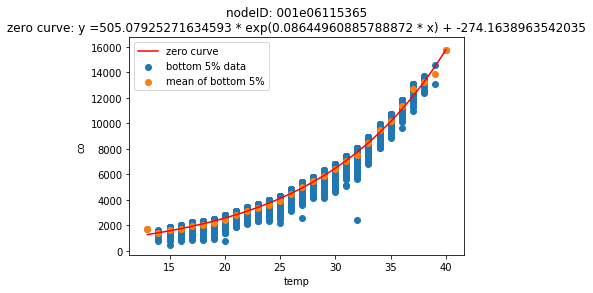

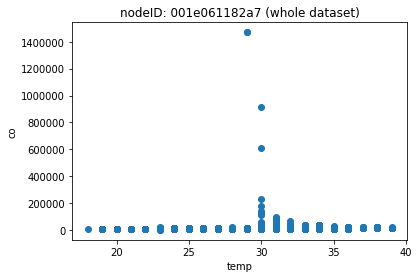

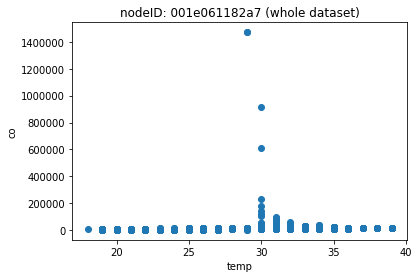

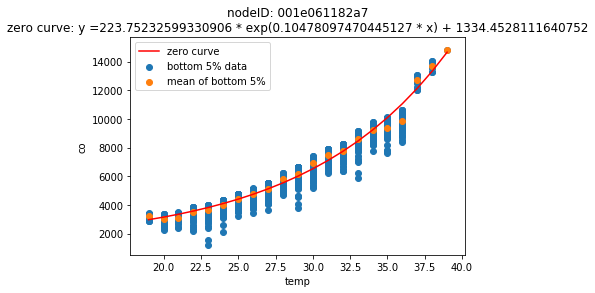

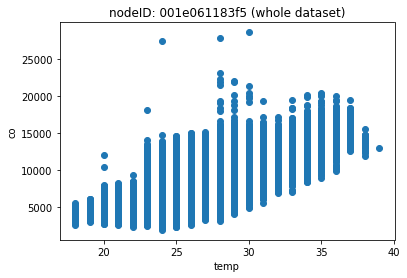

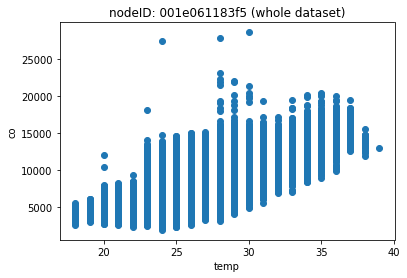

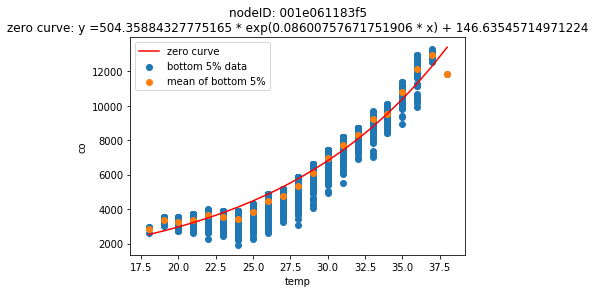

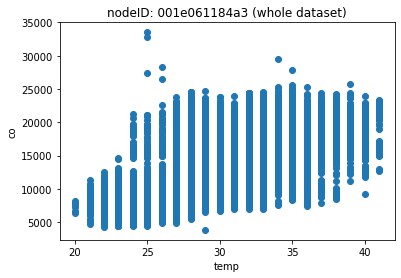

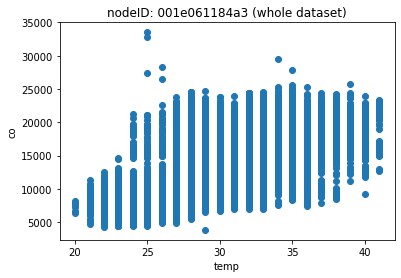

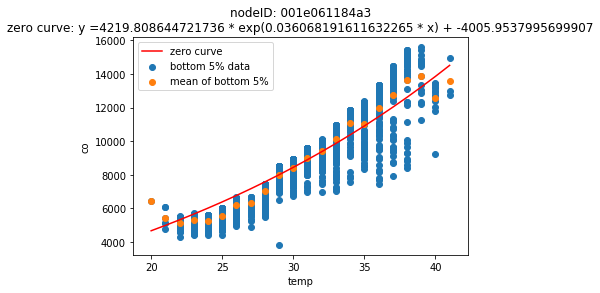

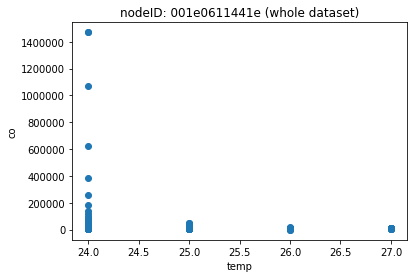

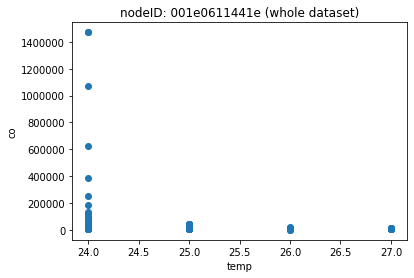

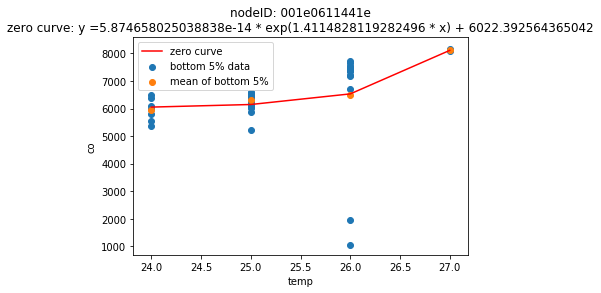

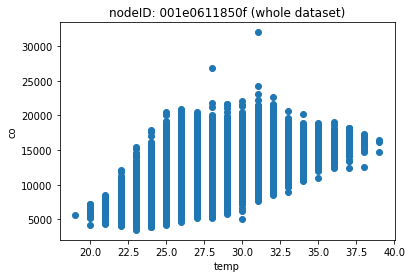

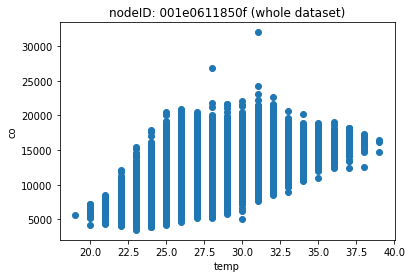

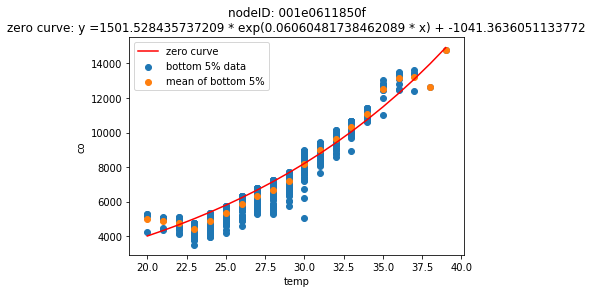

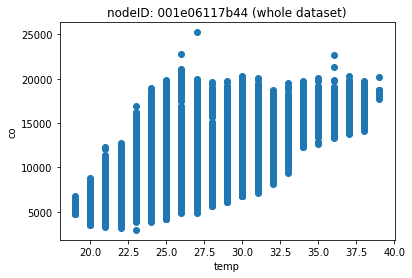

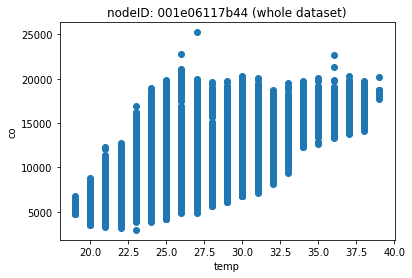

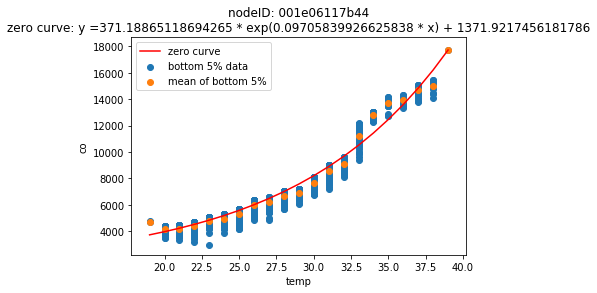

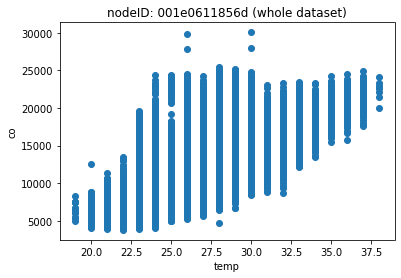

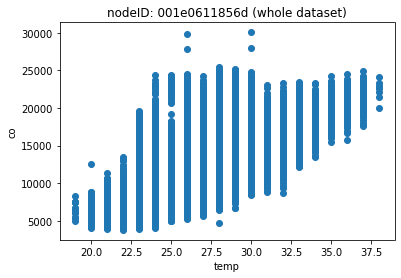

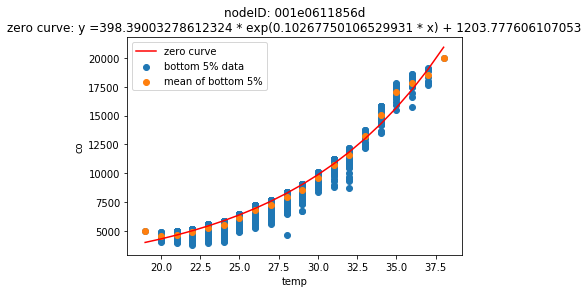

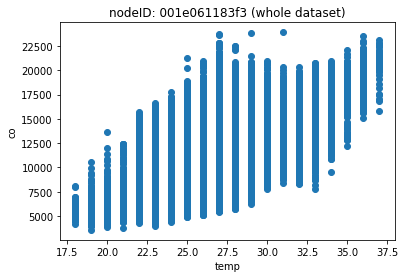

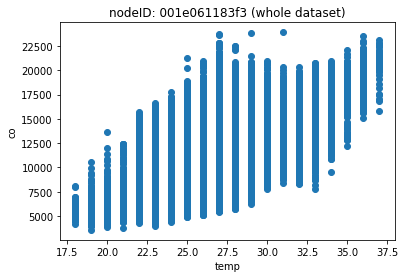

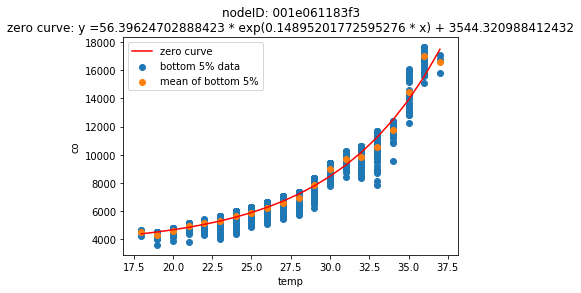

In [15]:
with open('data/curve_coefficients_co.csv', "w") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(['y=a*exp(b*x)+c'])
    writer.writerow(['NodeID', 'a', 'b', 'c'])
    
    for i in range(co_temp['node_id'].nunique()):

        node = pd.read_csv('nodedata_co/'+nodes[i]+'.csv',header = 0, index_col=0)
        node['temp'] = round(node['temp'])
        node = node[~node['temp'].isna()]
        node = node.sort_values(by=['temp'])
        plt.figure()
        plt.scatter(node['temp'], node['co_raw'])
        plt.title('nodeID: '+nodes[i] +' (whole dataset)')
        plt.xlabel('temp')
        plt.ylabel('co')
        #plt.savefig('node_pic_abs_co/'+nodes[i]+'_1.png')
    
        node['abs_co_raw'] = abs(node['co_raw'])
        plt.figure()
        plt.scatter(node['temp'], node['abs_co_raw'])
        plt.title('nodeID: '+nodes[i] +' (whole dataset)')
        plt.xlabel('temp')
        plt.ylabel('co')
        #plt.savefig('node_pic_abs_co/'+nodes[i]+'_2.png')
       
        node_bottom = node[(node['abs_co_raw'] < node.groupby('temp')['abs_co_raw'].transform(lambda x: x.quantile(0.05)))]
        node_bottom_mean = node_bottom.groupby('temp').mean().reset_index()
    
        xdata = np.array(node_bottom_mean['temp'])
        ydata = np.array(node_bottom_mean['abs_co_raw'])
        popt, pcov = curve_fit(func, xdata, ydata, maxfev = 50000)
        
        writer.writerow([nodes[i], str(popt[0]), str(popt[1]), str(popt[2])])
        
        plt.figure()
        plt.scatter(node_bottom['temp'], node_bottom['abs_co_raw'], label='bottom 5% data') #show scatter plot of original data
        plt.scatter(node_bottom_mean['temp'], node_bottom_mean['abs_co_raw'],label='mean of bottom 5%') 
        plt.plot(xdata,func(xdata, *popt),'r-', label='zero curve')
        plt.xlabel('temp')
        plt.ylabel('co')
        plt.title('nodeID: '+nodes[i] +'\n'+
         'zero curve: y =' + str(popt[0]) + ' * exp('+ str(popt[1]) + ' * x)' + ' + ' + str(popt[2]))
        plt.legend(loc=2)
        #plt.savefig('node_pic_abs_co/'+nodes[i]+'_3.png')
        

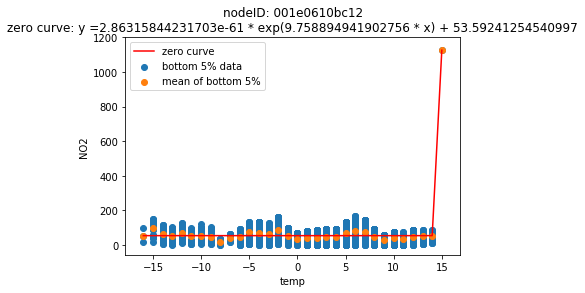

In [44]:
xdata = np.array(node_bottom_mean['temp'])
ydata = np.array(node_bottom_mean['abs_no2_raw'])
popt, pcov = curve_fit(func, xdata, ydata, maxfev = 40000)

plt.scatter(node_bottom['temp'], node_bottom['abs_no2_raw'], label='bottom 5% data') #show scatter plot of original data
plt.scatter(node_bottom_mean['temp'], node_bottom_mean['abs_no2_raw'],label='mean of bottom 5%') 
plt.plot(xdata,func(xdata, *popt),'r-', label='zero curve')
plt.xlabel('temp')
plt.ylabel('NO2')
plt.title('nodeID: '+nodes[32] +'\n'+
         'zero curve: y =' + str(popt[0]) + ' * exp('+ str(popt[1]) + ' * x)' + ' + ' + str(popt[2]))
plt.legend(loc=2)
plt.savefig('nodepic/'+nodes[32]+'_3.png')